# 카드소비 패턴 분석 - SHINHAN ROSY팀
깃허브:  
데이터셋:

## 1.1. 데이터 개요
Dacon의 [카드소비 패턴 시각화 경진대회](https://dacon.io/competitions/official/235907/overview/description)에서 사용된 데이터셋입니다.
> 국내 전 지역 가맹점을 대상으로 서울시민의 개인카드(신용카드, 체크카드. 법인카드 제외) 사용 패턴 집계.  

## 1.2. 내용 개요


1.   항목 추가
2.   항목 추가



## 구글 드라이브 마운트:
BASE_DIR 에 colab에서 구글 드라이브에 저장된 csv파일에 접근하는 경로를 저장합니다.

In [ ]:
#some codes for mount drive in google
from google.colab import drive
drive.mount('/content/drive')
from collections import OrderedDict

BASE_DIR = r'/content/drive/MyDrive/_aiffel/_datathon_rosy/CrdCnsmptn/csv/' #directory of csv files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 글꼴 설치 (피규어 한글 출력)
실행 후 런타임->런타임 다시 시작 필요

In [ ]:
#restart runtime after installation
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
import seaborn as sns
#plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font_scale=1.5)
plt.rc('font', family='NanumGothic')
#plt.rcParams['font.family'] = 'NanumGothic'
#plt.rcParams['axes.titlepad']=20
from math import pi
import warnings
warnings.filterwarnings("ignore")

other_color = "salmon"
korea_color = "skyblue"

#BASE_DIR = r'/content/drive/MyDrive/_aiffel/_datathon_rosy/CrdCnsmptn/csv/'


block_time_card = pd.read_csv('/content/drive/MyDrive/aiffel/datathon/블록별 시간대별소액결제건수 카드소비패턴.csv', encoding = 'cp949')
block_time_card.rename(columns = {'서울시민업종코드(UPJONG_CD)' : 'upjoing_cd', '기준년월(YM)' : 'ym',
                                  '시간대구간(TIME)' : 'time', '고객주소블록코드(BLOCK_CD)' : 'block_cd',
                                  '소액결제건수(MICRO_PYM)' : 'micro_pym', '카드이용금액계(AMT_CORR)' : 'amt_corr'}, inplace = True)

card_use_pattern = pd.read_csv('/content/drive/MyDrive/aiffel/datathon/블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')
card_use_pattern.rename(columns={'서울시민업종코드(UPJONG_CD)' : 'upjoing_cd', '기준년월(YM)' : 'ym' , 
                         '고객주소블록코드(BLOCK_CD)' : 'block_cd', '성별(GEDNER)' : 'gender',
                        '연령대별(AGE)' : 'age', '카드이용금액계(AMT_CORR)' : 'amt_corr',
                         '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)
card_use_pattern['Sex'] = card_use_pattern['gender'] == 'M'

card_use_code = pd.read_csv('/content/drive/MyDrive/aiffel/datathon/카드소비 업종코드.csv', encoding='cp949')
card_use_code.rename(columns={'업종코드(UPJONG_CD)' : 'upjoing_cd', '대분류(CLASS1)' : 'class1' , 
                         '중분류(CLASS2)' : 'class2', '소분류(CLASS3)' : 'class3'}, inplace = True)

agg_card_where = pd.read_csv('/content/drive/MyDrive/aiffel/datathon/집계구별 일별소비지역별 카드소비패턴.csv' , encoding='cp949')
agg_card_where.rename(columns= {'가맹점주소광역시도(SIDO)' : 'sido', '가맹점주소시군구(SGG)' : 'sgg', 
                                '업종대분류(UPJONG_CLASS1)' : 'class1', '기준일자(YMD)' : 'ymd',
                               '고객주소집계구별(TOT_REG_CD)' : 'tot_reg_cd', '카드이용금액계(AMT_CORR)' : 'amt_corr',
                               '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)

agg_card_time = pd.read_csv('/content/drive/MyDrive/aiffel/datathon/집계구별 일별시간대별 카드소비패턴.csv', encoding = 'cp949')
agg_card_time.rename(columns={'업종대분류(UPJONG_CLASS1)': 'class1', '기준일자(YMD)' : 'ymd',
                              '시간대구간(TIME)' : 'time', '고객주소집계구별(TOT_REG_CD)' : 'tot_reg_cd',
                             '카드이용금액계(AMT_CORR)' : 'amt_corr', '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)

# 결측치 체크

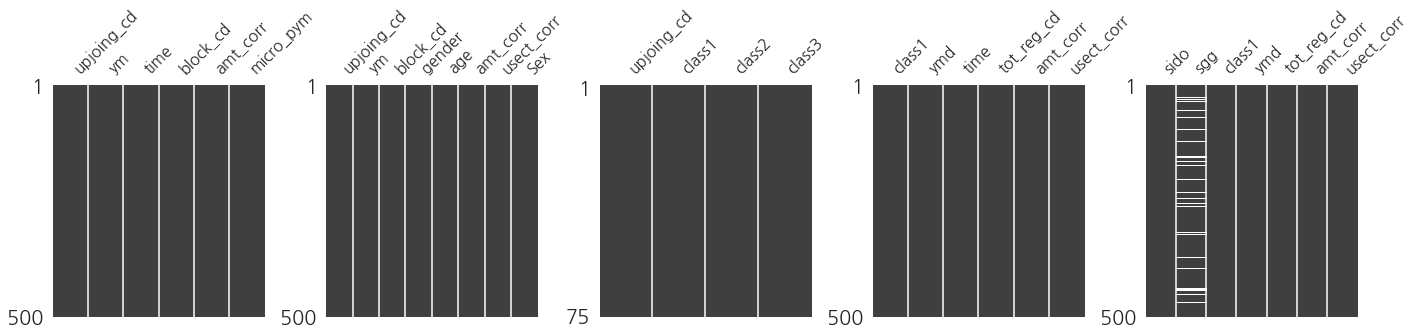

In [ ]:
import missingno as msno

fig, ax=plt.subplots(1,5,figsize=(20,5))
msno.matrix(block_time_card, ax=ax[0])
msno.matrix(card_use_pattern, ax=ax[1])
msno.matrix(card_use_code, ax=ax[2])
msno.matrix(agg_card_time, ax=ax[3])
msno.matrix(agg_card_where, ax=ax[4])
plt.tight_layout(w_pad=-2.0)
plt.show()

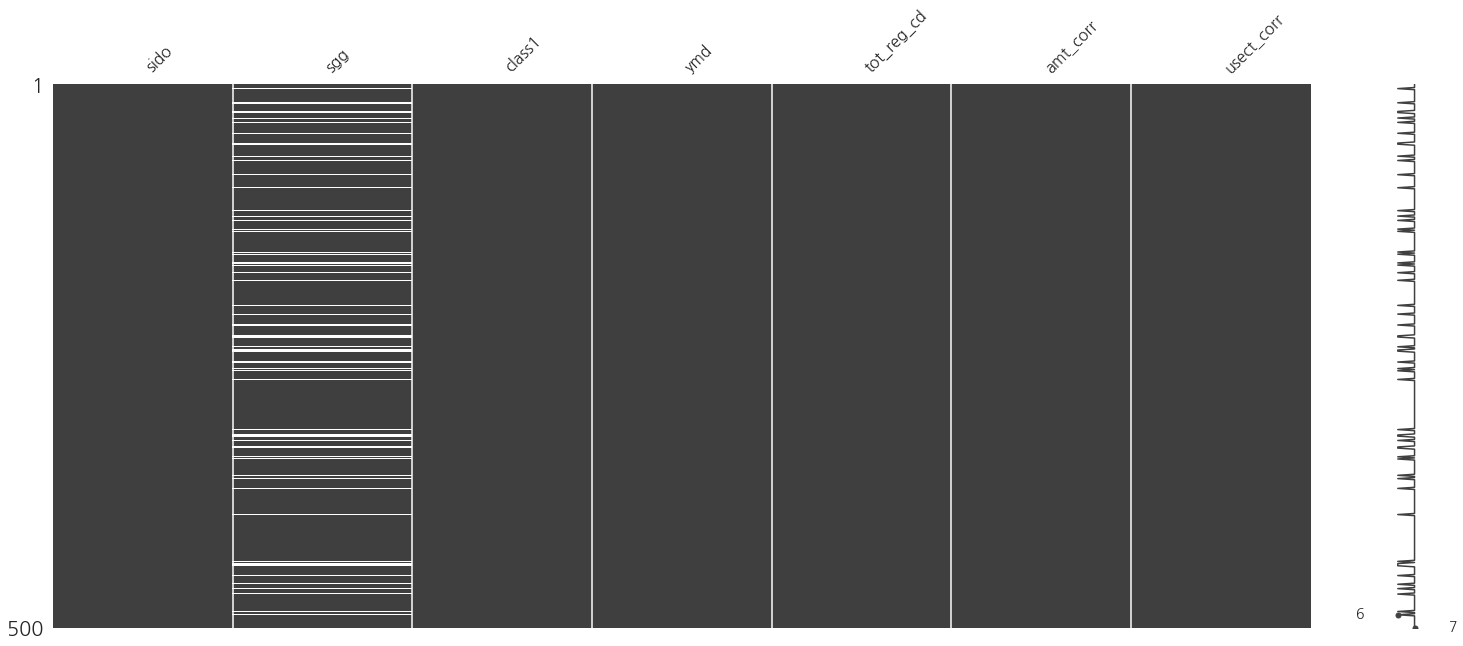

In [ ]:
msno.matrix(agg_card_where)

In [ ]:
for c in agg_card_where.columns:
    print('{} : {}'.format(c, len(agg_card_where.loc[pd.isnull(agg_card_where[c]), c].values)))

    # sgg 에 58개의 널값을 발견

sido : 0
sgg : 58
class1 : 0
ymd : 0
tot_reg_cd : 0
amt_corr : 0
usect_corr : 0


In [ ]:
agg_card_where.head(6)

,sido,sgg,class1,ymd,tot_reg_cd,amt_corr,usect_corr
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
4,서울,NaN,가정생활/서비스,20210216,1117052020001,65390,10
5,경기,마포구,유통,20200319,1108060020010,20120,25


- 결측치가 있는 행을 제거합니다

In [ ]:
agg_card_where.dropna(axis=0,how='any',inplace=True)

- 결측치가 잘 제거 되었는지 매트릭스를 통해 확인 해 봅니다:

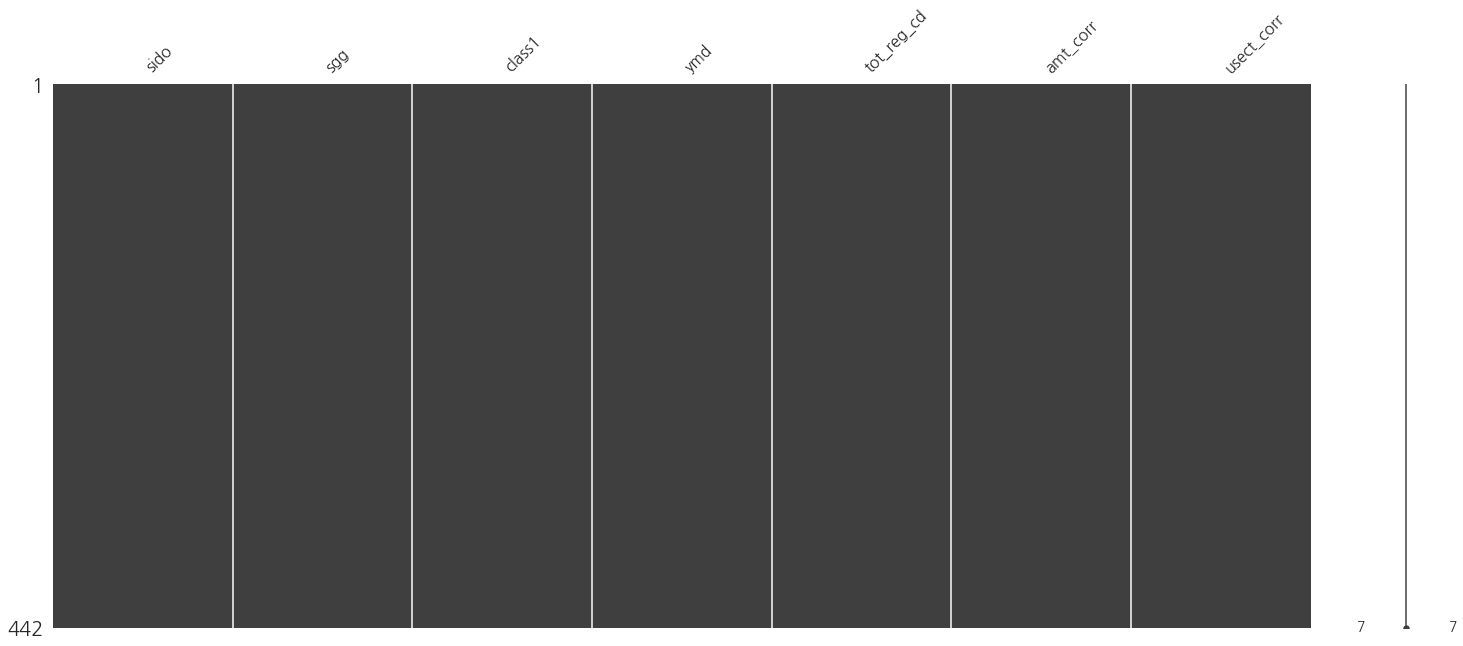

In [ ]:
msno.matrix(agg_card_where)

- 500개의 데이터에서 442개로 58개의 결측치가 있는 행을 제거했습니다

# 3. 데이터 전처리 및 시각화
## 3.1. 성별/연령대별 소비 패턴
### 성별/연령대별 자료수

## 3.2 지역별 소비 패턴

### i. 광역시별 자료분포

- 전체 데이터에서 광역시 별로 데이터의 분포를 시각화 합니다

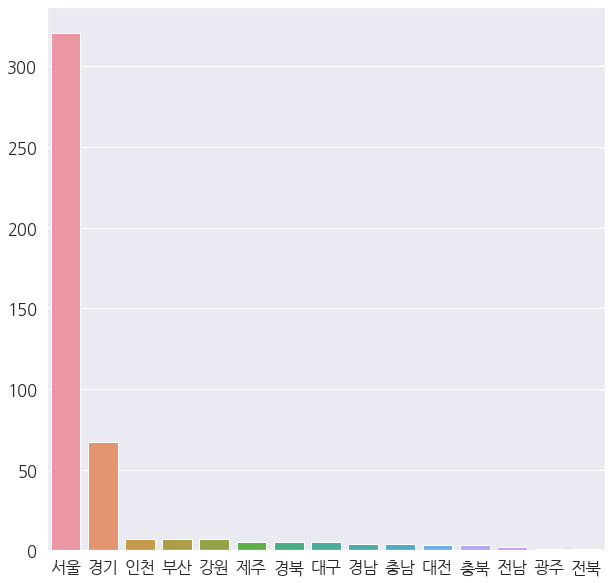

In [ ]:
t =agg_card_where['sido'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=t.index,y=t.values)

서울 경기지역에 데이터가 몰려있는것을 확인 할 수있습니다

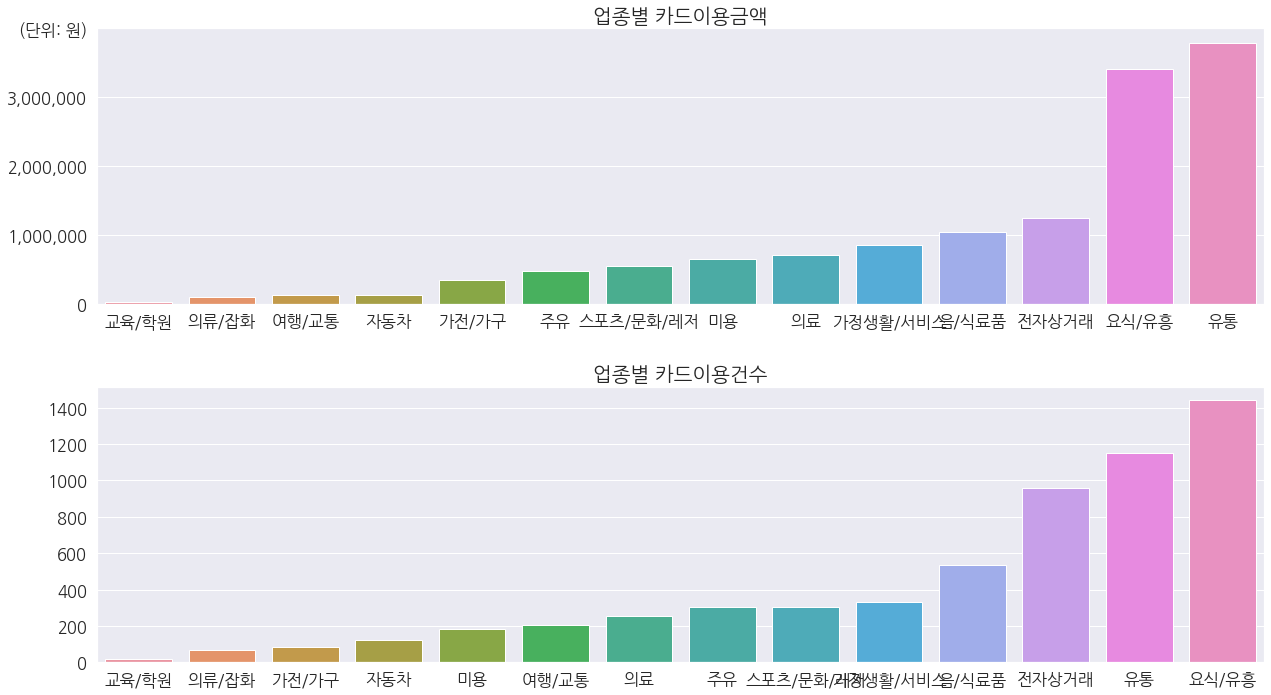

In [ ]:
# 전체 광역시 업종별 빈도수 확인

plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
t =agg_card_where.groupby(by= 'class1').sum()['amt_corr'].sort_values()
g1 = sns.barplot(x=t.index,y=t.values)
g1.set_title("업종별 카드이용금액",fontsize=20)
g1.set_xlabel("")
g1.set_yticks([0,1e7,2e7,3e7,4e7])
g1.set_yticklabels(['0','1,000,000','2,000,000','3,000,000','(단위: 원)'])

plt.subplot(2,1,2)

t2 =agg_card_where.groupby(by= 'class1').sum()['usect_corr'].sort_values()
g2 =sns.barplot(x=t2.index,y=t2.values)
g2.set_title("업종별 카드이용건수",fontsize=20)
g2.set_xlabel("")

plt.tight_layout(h_pad=2) #pad, h_pad, w_pad : 서브플롯 간의 간격 조정
plt.show()

### 서울시 업종별 카드이용 금액/건수 계

- 대부분의 데이터가 서울에 몰려있기 때문에 서울에서의 업종별로 소비금액/건수에 대해 시각화 해보겠습니다

[]

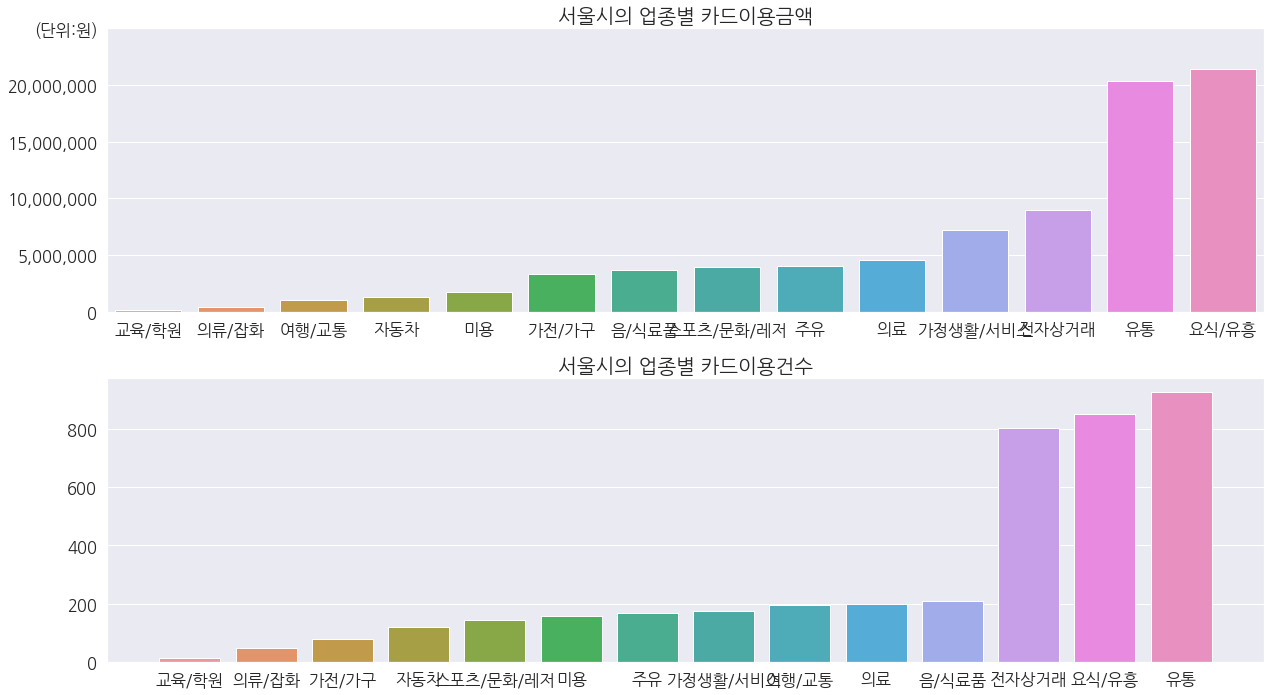

In [ ]:
plt.figure(figsize=(18,10))

#plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,1)
t = agg_card_where[( agg_card_where['sido'] == '서울')].groupby(by= 'class1').sum()['amt_corr'].sort_values()
g =sns.barplot(x=t.index,y=t.values)
g.set_title("서울시의 업종별 카드이용금액",fontsize=20)
#g.set_ylabel("(단위: 원)")
g.set_xlabel("")
g.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000])
g.set_yticklabels(['0', '5,000,000', '10,000,000', '15,000,000', '20,000,000', '(단위:원)'])

#plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.subplot(2,1,2)
t2 = agg_card_where[( agg_card_where['sido'] == '서울')].groupby(by= 'class1').sum()['usect_corr'].sort_values()
g2=sns.barplot(x=t2.index,y=t2.values)
g2.set_title("서울시의 업종별 카드이용건수",fontsize=20)
g2.set_xlabel("")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.tight_layout()
plt.plot()

유통과 요식에 돈을 많이 쓴걸 확인 할 수있습니다

### 서울시 지역구별 카드이용금액/카드 이용 건수

이번엔 지역구별 카드사용금액/ 건수를 알아보겠습니다

Index(['sido', 'sgg', 'class1', 'ymd', 'tot_reg_cd', 'amt_corr', 'usect_corr'], dtype='object')


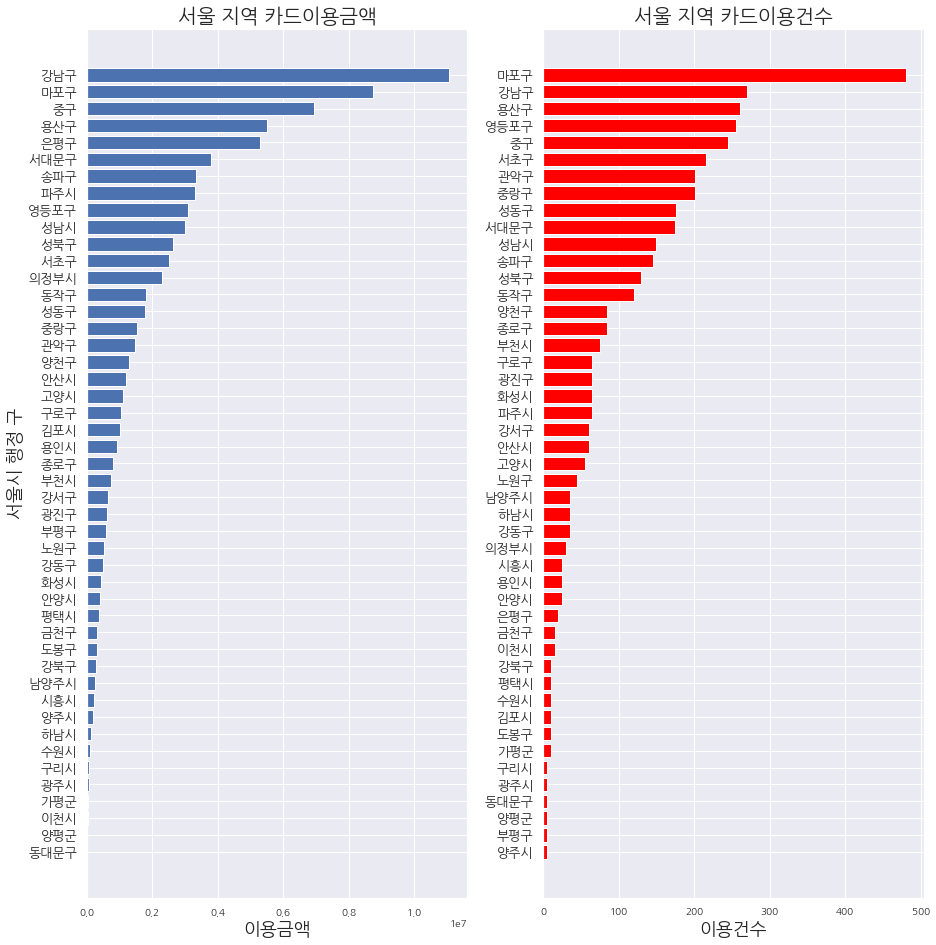

In [ ]:
print(agg_card_where.columns)
t = agg_card_where[( agg_card_where['sido'] == '서울')].groupby(by='sgg').sum()['amt_corr'].sort_values()

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=13)
plt.figure(figsize = (15,16))


plt.subplot(1,2,1)
plt.title('서울 지역 카드이용금액',fontsize=20)
plt.ylabel('서울시 행정 구')
plt.xlabel('이용금액')
plt.barh(t.index,t)


t2 = agg_card_where[( agg_card_where['sido'] == '서울')].groupby(by= 'sgg').sum()['usect_corr'].sort_values()
plt.subplot(1,2,2)
plt.title('서울 지역 카드이용건수',fontsize=20)
# plt.ylabel('서울시 행정 구')
plt.xlabel('이용건수')
plt.barh(t2.index,t2,color='red')

plt.show()


어디가 높은지 보기 쉽게 높은순으로 정리를 했습니다
이용건수는 마포구, 사용금액은 강남구가 가장 높은것을 확인 할 수있습니다

이용건수가 가장 높은 마포구에선 어떤 업종에 돈을 쓰는지 확인 해 보겠습니다

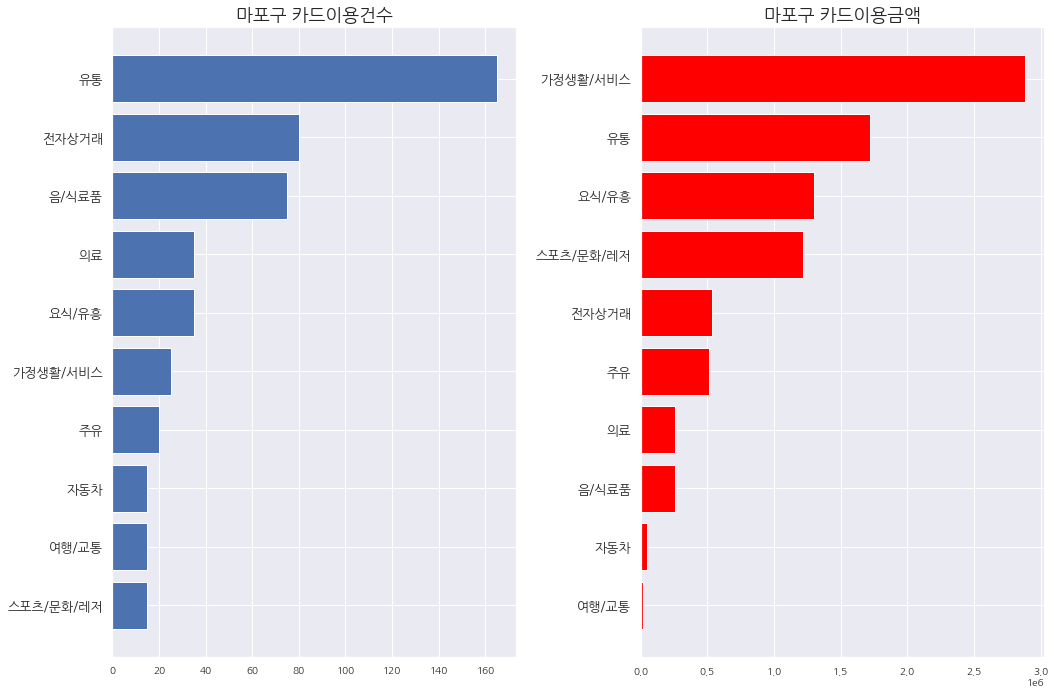

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
t = agg_card_where[( agg_card_where['sido'] == '서울') & (agg_card_where['sgg'] == '마포구')].groupby(by= 'class1').sum()['usect_corr'].sort_values()
plt.title('마포구 카드이용건수')
plt.barh(t.index,t)


plt.subplot(1,2,2)
t2 = agg_card_where[( agg_card_where['sido'] == '서울') & (agg_card_where['sgg'] == '마포구')].groupby(by= 'class1').sum()['amt_corr'].sort_values()
plt.title('마포구 카드이용금액')
plt.barh(t2.index,t2,color='red')
plt.tight_layout()
plt.show()

유통에 가장 많은 건수와   가정생활/서비스에 가장 많은 금액을 사용된걸 확인 할 수있습니다

다음은 강남구에 대해 알아보겠습니다

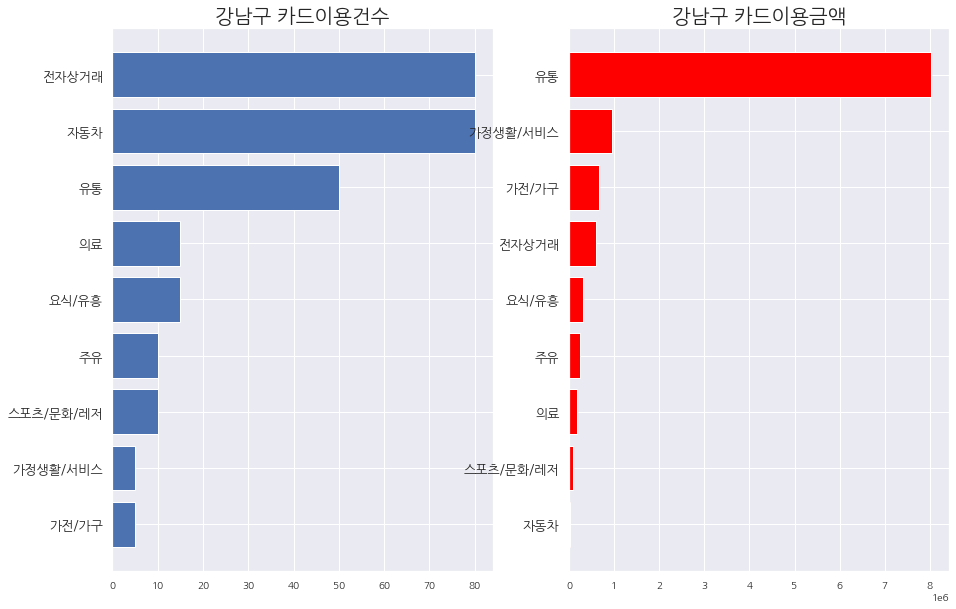

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
t = agg_card_where[( agg_card_where['sido'] == '서울') & (agg_card_where['sgg'] == '강남구')].groupby(by= 'class1').sum()['usect_corr'].sort_values()
plt.title('강남구 카드이용건수',fontsize=20)
plt.barh(t.index,t)


plt.subplot(1,2,2)
t2 = agg_card_where[( agg_card_where['sido'] == '서울') & (agg_card_where['sgg'] == '강남구')].groupby(by= 'class1').sum()['amt_corr'].sort_values()
plt.title('강남구 카드이용금액',fontsize=20)
plt.barh(t2.index,t2,color='red')

plt.show()

- 이용건수는 전자상거래가 가장 높았고 카드 이용금액은 유통이 가장 높았습니다

- 강남구의 카드 이용건수는 80건인데 비해 결제 금액은 2만원대입니다
- 이를통해 데이터셋에 이상이 있음을 확인 할 수있습니다

## 3.3 시간대 

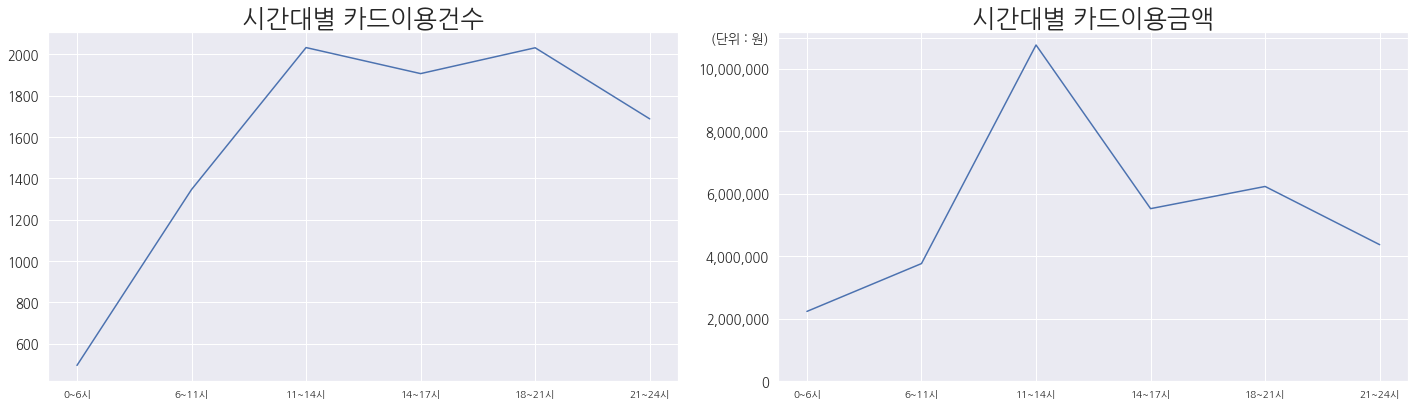

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,6))
data4=agg_card_time
sns.lineplot(data=data4,x='time',y='usect_corr',estimator=sum, ci=None,ax=ax[0])
sns.lineplot(data=data4,x='time',y='amt_corr',estimator=sum, ci=None,ax=ax[1])


ax[1].set_xticks(range(1,7))
ax[1].set_xticklabels(['0~6시','6~11시','11~14시','14~17시','18~21시','21~24시'])
ax[1].set_yticks([0,0.2e8,0.4e8,0.6e8, 0.8e8, 1e8, 1.1e8])
ax[1].set_yticklabels([0,'2,000,000','4,000,000','6,000,000', '8,000,000', '10,000,000', '(단위 : 원)'])
ax[0].set_xticks(range(1,7))
ax[0].set_xticklabels(['0~6시','6~11시','11~14시','14~17시','18~21시','21~24시'], fontsize=10)
ax[0].set_title('시간대별 카드이용건수',fontsize=25)
ax[1].set_title('시간대별 카드이용금액',fontsize=25)
ax[0].set_xlabel(None)
ax[0].set_ylabel('')
ax[1].set_xlabel(None)
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
data4_pivot=data4.pivot_table(index='class1',values='usect_corr'
                              ,columns='time',aggfunc=sum)
data4_pivot=data4_pivot.fillna(0)

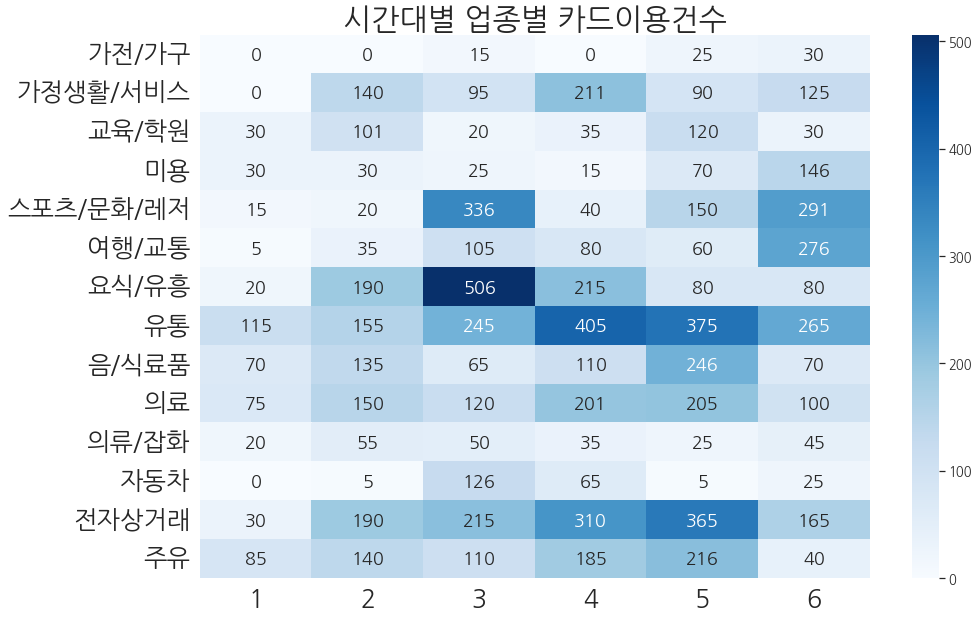

In [ ]:
plt.figure(figsize=(15,10))
plt.title('시간대별 업종별 카드이용건수',fontsize=30)
sns.heatmap(data4_pivot,annot=True,fmt='.0f',cmap='Blues')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel(None)
plt.ylabel('')
plt.show()

In [ ]:
data4_pivot1=data4.pivot_table(index='class1',values='amt_corr'
                              ,columns='time',aggfunc=sum)
data4_pivot1=data4_pivot1.fillna(0)

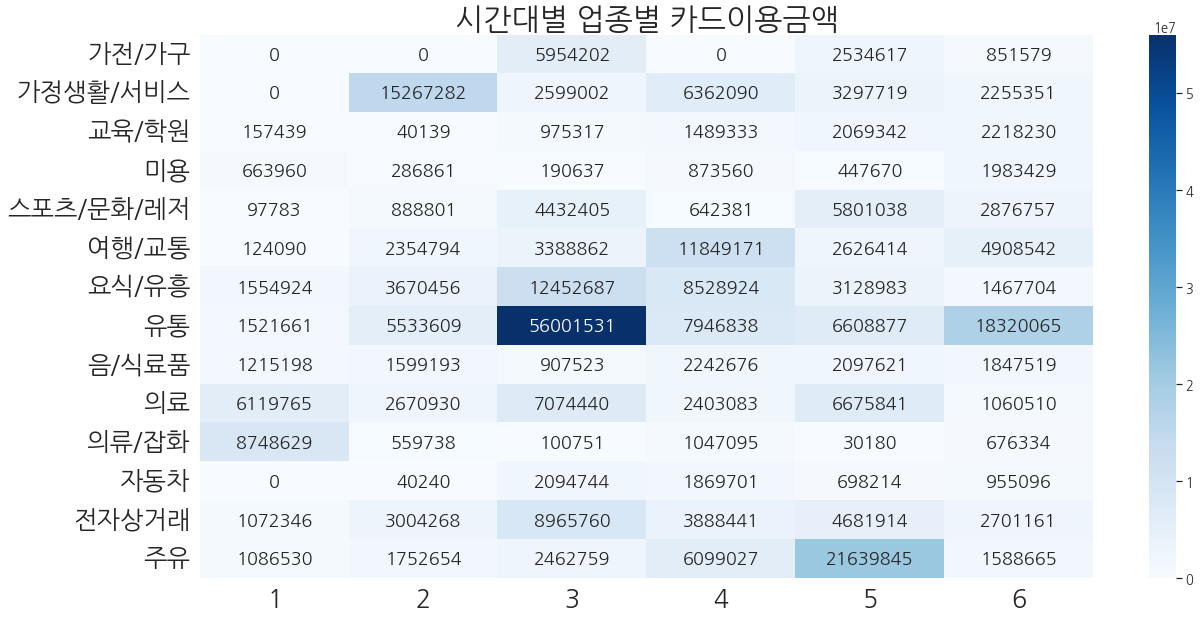

In [ ]:

plt.figure(figsize=(20,10))
plt.title('시간대별 업종별 카드이용금액',fontsize=30)
sns.heatmap(data4_pivot1,annot=True,fmt='.0f',cmap='Blues')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel(None)
plt.ylabel('')
plt.show()